# 9 モデルの検証方法とチューニング方法

- **[9.1 この章で学ぶこと](#9.1-この章で学ぶこと)**
    - [9.1.1 過学習の対処法とモデルチューニング方法](#9.1.1-過学習の対処法とモデルチューニング方法)
    - [9.1.2 混同行列とROC曲線](#9.1.2-混同行列とROC曲線)
    - [9.1.3 シミュレーションと計算統計学の基礎](#9.1.3-シミュレーションと計算統計学の基礎)
    - [9.1.4 アンサンブル学習](#9.1.4-アンサンブル学習)
<br><br>
- **[9.2 過学習の対処法とモデルチューニング方法](#9.2-過学習の対処法とモデルチューニング方法)** 
    - [9.2.1 ホールドアウト法と交差検証法](#9.2.1-ホールドアウト法と交差検証法)
    - [9.2.2 グリッドサーチ](#9.2.2-グリッドサーチ)
    - [9.2.3 モデル構築期間やその他](#9.2.3-モデル構築期間やその他)
    - [9.2.4 特徴量の扱い](#9.2.4-特徴量の扱い)
<br><br> 
- **[9.3 混同行列とROC曲線](#9.3-混同行列とROC曲線)** 
    - [9.3.1 混同行列](#9.3.1-混同行列)
    - [9.3.2 ROC曲線とAUC](#9.3.2-ROC曲線とAUC)
<br><br>
- **[9.4 シミュレーションと計算統計学の基礎](#9.4-シミュレーションと計算統計学の基礎)**
    - [9.4.1 ジャックナイフ法](#9.4.1-ジャックナイフ法)
    - [9.4.2 ブートストラップ法](#9.4.2-ブートストラップ法)
    - [9.4.3 EMアルゴリズム](#9.4.3-EMアルゴリズム)
<br><br>
- **[9.5 アンサンブル学習](#9.5-アンサンブル学習)**
    - [9.5.1 バギング](#9.5.1-バギング)
    - [9.5.2 ブースティング](#9.5.2-ブースティング)
    - [9.5.3 ランダムフォレスト](#9.5.3-ランダムフォレスト)
<br><br>
- **[9.6 総合問題](#9.6-総合問題)**
    - [9.6.1 総合問題1](#9.6.1-総合問題1)
    - [9.6.2 総合問題2](#9.6.2-総合問題2)

## 9.1 この章で学ぶこと
ゴール：モデルを構築するときの注意点や検証の方法の概要を知る

In [22]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析モジュール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第5まで表示
%precision 5

'%.5f'

### 9.1.1 過学習の対処法とモデルチューニング方法
キーワード：ホールドアウト法、交差検証法、グリッドサーチ、特徴選択、特徴抽出

前章で学んだ機械学習の教師あり学習では、学習データとテストデータに分けてモデルを構築・検証してきました。モデリングする前に、チェック用のデータを除いておいて、後からうまくいくかどうか確認するという作業はとても大切です。現在持っているデータに対してだけ良いモデルを作成すればいいというわけではありません。今あるデータにうまく適合させてモデルを作成しても、新しいデータや将来のデータに対してうまく予測できないとあまり意味はありません。

このように現在のデータにあてはまりすぎて、新しいデータに適合できていない状態を**オーバーフィッティング（過学習）**といいます。それを防ぐために、あらかじめテスト用にデータを抜き出しておく**ホールドアウト法**や**交差検証法**について学びます。また、モデルの中にあるあらかじめ設定しなければならないパラメータをうまく見つけていく方法**グリッドサーチ**についても学びます。

他、モデリングする際の注意点（データ期間、**特徴選択**と**特徴抽出**など）についても述べます。

### 9.1.2 混同行列とROC曲線
キーワード：混同行列、ROC曲線

さて、モデルの良さというのは実は色々な指標があります。今まで、モデルの予測精度や良さという話をしてきましたが、そもそも予測精度とは一体なんでしょうか。単にモデルがうまく予測できたからといって、手放しで喜んでいいわけではありません。ここでは、それらに関連する概念（**混同行列**や**ROC曲線**など）や注意点について学びます。

### 9.1.3 シミュレーションと計算統計学の基礎
キーワード：ジャックナイフ法、ブートストラップ法、EMアルゴリズム

モデルを構築するにはデータが必要ですが、いつも十分にデータがあるわけではありません。またこの講座の前半で紹介したように、欠損しているデータもあります。そこで、今ある限られたデータの中から予測や妥当な計算をしたいというモチベーションがあります。さらに、理論的なアプローチが難しい問題について、コンピューター（計算機）を使って解析的にアプローチしたいというケースもあるでしょう。

ここではそういった問題にアプローチするシミュレーションや計算統計学の基礎を学びます。具体的には、リサンプリングの手法である**ジャックナイフ法**や**ブートストラップ法**などがあります。ジャックナイフ法は、対象となるデータから1つだけデータを取っておいて、残りのデータを使って計算する手法です。ブートストラップ法は、1章で学んだ復元抽出を実行します。次のアンサンブル学習で使うため、ここで簡単に紹介します。昨今、コンピューターの性能が向上していますので、このような大量反復計算が気軽にできるようになっています。

また、関連して計算統計学の方法（**EMアルゴリズム**など）についても少し紹介します。EMアルゴリズムは、1章で学んだ確率統計の最尤法や、前章で学んだk-meansとも関係があり、幅広い分野で応用されています。

### 9.1.4 アンサンブル学習
キーワード：バギング、ブースティング、ランダムフォレスト

予測モデルについて、前章の機械学習の基礎で色々な方法（決定木、ロジスティック回帰などのモデル）を個別に学びました。ここでは、複数のモデルを組み合わせて分類を実施する方法、**アンサンブル学習**について学びます。個々の学習結果を組み合わせて、複数の結果で評価します。具体的には**バギング、ブースティング**などがあります。

バギングは上で説明したブートストラップ法によって弱識別器（それほど精度が高くないですが、ランダムな識別器より少し良いモデル）を生成し、それらを使って最終的な識別器を構築する方法です。データを復元抽出して、その標本で識別器を学習させます。そのバギングの一種であるランダムフォレストという手法があり、決定木を弱識別器として構築する方法です。このアンサンブル学習も、識別器の精度を高めていくためのモデルチューニング方法だと考えることができます。ブースティング（アダブースト）は、逐次的に弱識別器を構築する方法です。

>[参考URL]

>http://scikit-learn.org/stable/modules/ensemble.html

## 9.2 過学習の対処法とモデルチューニング方法
ゴール：モデルの過学習を防ぎ、より良い予測モデルを構築する方法を知る

### 9.2.1 ホールドアウト法と交差検証法
キーワード：過学習、ホールドアウト法、交差検証法

前章では、機械学習のモデルを構築する際に、学習データとテストデータを分けてモデル構築・検証をしました。要するに、検証データにおいてモデルのあてはまり評価指標が高くなるようにモデルパラメータを決定しました。この方法を**ホールドアウト法**といいます。私たちがやりたいことは、今あるデータだけに使えるのではなく、将来のデータや新しいデータを予測することです。今持っているデータはもう既に答えがわかっているので、その予測精度が上がったとしてもあまり意味がありません。先ほども述べましたが、このデータに適合し過ぎて汎用化できてない状態を、**過学習（オーバーフィッティング）**といいます。このオーバーフィッティングを防ぐために、ホールドアウト法を使って、未知のデータの予測結果を評価します。

ただ、このホールドアウト法には、問題点があります。それは、学習データとテストデータの選び方によって、性能の評価が変わってくることがあるということです。分割をするときに、シードを指定しなければ、基本ランダムにデータを取ってきますので、たまたまある学習データとテストデータの分割で性能が高くなってしまう可能性もあります。

そこで、1回の分割だけではなく、k回分割をして検証を繰り返して実施する方法があり、これが**k分割交差検証法**です。上記でのホールドアウト方の欠点を補うだけでなく、データを無駄なくモデル作成に利用できるので、計算コストはかさみますが、好まれる手法です。具体的にk=5の場合を試してみます。下の図を見てください、5組のデータグループができます。4つのグループを学習データ用、1つをテスト用のグループとして検証します。これは5パターンありますので、5回、あるモデルに対して計算が行われることになります。

![comment](https://i.stack.imgur.com/1fXzJ.png)

参照URL：https://i.stack.imgur.com/1fXzJ.png

以下は、前章の機械学習で学んだ決定木を使って、交差検証を実施しています。交差検証はcross_val_scoreを使用し、パラメータは、「手法（ここでは決定木）、対象データ、ターゲットとなる目的変数、分割数(k)」を設定します。

In [16]:
# 分析対象データ
from sklearn.datasets import load_breast_cancer
# 決定木
from sklearn.tree import  DecisionTreeClassifier

# データの読み込み
cancer = load_breast_cancer()

# 決定木インスタンス（エントロピー）
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

交差検証は、以下のように実装します。

In [17]:
# 交差検証法
from sklearn.model_selection import cross_val_score

# cv　で分割数を決定する。デフォルトは3。
scores = cross_val_score(tree,cancer.data,cancer.target,cv=5)

print("Cross validation scores:{}".format(scores))

Cross validation scores:[ 0.90434783  0.91304348  0.95575221  0.9380531   0.95575221]


cross_val_scoreのパラメータのcvを5と設定したので、上記では5つの正解率が表示されています。総合評価するため、それぞれのスコアの平均は以下のように算出します。

In [18]:
print("Cross validation scores(mean):{}".format(scores.mean()))

Cross validation scores(mean):0.933389765294344


このモデル交差検証の結果、スコアが90%~95%になっており、比較的安定しているのがわかります。

>**[やってみよう]**

>他のモデルやデータで交差検証するとどうなるか試してみましょう。CVの数等も変えて実行してみてください。

#### <練習問題 1>

上記のデータに対して、異なるモデル（ロジスティック回帰分析など）を作成し、交差検証を実施してみましょう。上記のモデルの結果と比較して、違いはありますか。

### 9.2.2 グリッドサーチ
キーワード：グリッドサーチ

前はモデルの汎用化をチェックするために、学習データとテストデータを分けて、検証を実施しました。次は、より良いモデルを作成するために、パラメータのチューニング方法について学びましょう。ここで学ぶ**グリッドサーチ**とは、基本的に注目しているパラメーターのいくつかの組み合わせについて、それら全ての計算を試みる方法をいいます。

具体的には、サポートベクターマシンにはパラメータのgammaとCがあります。以下は、そのパラメータであるgammaとCをいくつかセットして、ベストなスコアになる組み合わせを探しています。

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

best_score = 0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_param = {'C':C,'gamma':gamma }

print("ベストスコア:{:.2f}".format(best_score))
print("その時のパラメータ:{}".format(best_param))

ベストスコア:0.91
その時のパラメータ:{'C': 1, 'gamma': 0.001}


上記より、スコアが0.91がベストで、その時のパラメータは、Cは1、gammaは0.001になります。

次は、グリッドサーチと交差検証をやります。GridSearchCVを使います。

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# パラメータの設定
param_grid = { 'C':[0.001,0.01,0.1,1,10,100]
              ,'gamma':[0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(SVC(),param_grid,cv=5)

# データの読み込み
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

grid_search.fit(X_train,y_train)

print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))

Test set score:0.91
Best parameters:{'C': 1, 'gamma': 0.001}
Best cross-validation score:0.93


交差検証におけるベストスコアは0.93になりました。このグリッドサーチもモデルによってパラメータは異なりますので、モデルのそれぞれについてチューニングできるパラメータを見つけて、実行してみましょう。

>**[やってみよう]**

>他のモデルやデータでどうやってグリッドサーチを実施しますか。パラメータを見るなどして、実行してみましょう。

#### <練習問題 1>

上記のデータに対して、決定木を使って、交差検証とグリッドサーチを実施してみましょう。なお、決定木のパラメータは深さなので、それをparam_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}のように設定して計算しましょう。

### 9.2.3 モデル構築期間やその他
キーワード：データ期間、プロファイリングモデル、予測モデル、検証データ

これまではモデリングをするときに、特に「データの期間」についてはあまり意識していませんでした。ここでは、対象データが時系列の場合やその他の注意事項について述べます。

モデル構築時に、データを説明変数と目的変数をセットしますが、モデルによってそれぞれのデータ期間の取り方を考える必要があります。以下の参考文献では、モデルを**プロファイリングモデル**と**予測モデル**に分けて説明しています。

プロファイリングモデルは説明変数と目的変数のデータ期間が同じ期間で構築します。一方、予測モデルは、説明変数が前の期間データ、目的変数が後の期間データにする必要があります。予測モデルはその名の通り、将来を予測することですから、その将来の説明変数はデータとして取得できないため、その前のデータ期間を説明変数として設定する必要があります。基本的に、将来の購買予測や離反予測をする場合には、プロファイリングモデルではありません。なぜならば、将来の予測をするのに同時期のデータはなく、説明変数は過去のデータを使うことになります。データで前処理をする場合には注意しましょう。

>[参考文献]

>『データマイニング手法 予測・スコアリング編―営業、マーケティング、CRMのための顧客分析』（ゴードン S.リノフ (著), マイケル J.A.ベリー (著), 佐藤 栄作 (翻訳), 斉藤 史朗 (翻訳)、海文堂出版）

>『データマイニング手法 探索的知識発見編―営業、マーケティング、CRMのための顧客分析』（ゴードン S.リノフ (著), マイケル J.A.ベリー (著), 佐藤 栄作 (翻訳), 斉藤 史朗 (翻訳)、海文堂出版）

なお、モデルを構築する際に、学習データとテストデータについて分けましたが、さらにモデリング時に学習データの中から検証データを抜いて構築することがあります。学習データと検証データでモデルパラメータを決定し、モデルパラメータの決定に関わっていないテストデータでさらに精度を確認する入念な方法です。専門書などによって説明やアプローチ等が異なりますので、注意しましょう。


### 9.2.4 特徴量の扱い
キーワード：特徴選択、特徴抽出

ここでは、モデルのチューニングを考える上で必要になってくる**特徴量**について少し触れたいと思います。（注：統計学では変数と呼ばれ、機械学習では特徴量(Feature)と呼ばれることが多いようです。）

モデリングを実施する際に、説明変数をどのように選ぶのかという問題がありました。この説明変数は特徴量ともいわれますが、特徴量をどうやって扱うかによって、モデルの予測精度が変わってきます。いろいろなモデルを試すより、この特徴量をしっかりと見極める方がより良いモデルが構築できることも多いです。

前章で述べた変数選択法もその1つですし、似ている変数があると多重共線性等の問題があり、それらをどうやってまとめるかという問題もありました。このように、**特徴選択**(変数を選ぶイメージです)や**特徴抽出**(変数合成のイメージです)にも気をつけてモデリングする必要があります。

さらに、ビジネス的な視点が重要になってくる作業でもあります。なぜならば、どの変数を使うか、どの変数が効いているのかということは、そのビジネスの現場にいる人たちの方が経験豊富なため、無駄な回り道をせず、特徴量の選択や抽出ができる可能性が高いからです。その業界の特有の問題、ビジネス的な背景などというのは、業界未経験者がすぐに把握するのは困難でしょう。（もちろん、新しい視点を加えるという意味では、良い面もあります。）

この作業をしっかりとできるようになれば、データサイエンティスト入門は卒業でしょう。特徴量に関する文献としては、以下がありますので、ぜひ参考にしてください。

>[参考文献]

>『Introduction to Machine Learning with Pyton』（Andreas C.Muller & Sarah Guido、O'REILLY）

>『データサイエンス講義』（Rachel Schutt (著), Cathy O'Neil (著), 瀬戸山 雅人  (翻訳), 石井 弓美子 (翻訳), & 7 その他、オライリージャパン）

>『Building Machine Learning Systems with Python』（Willi Richert (著), Luis Pedro Coelho (著), 斎藤 康毅  (翻訳)、翻訳：実践機械学習システム、オイラリージャパン）

>『Python Machine Learning』（Sebastian Raschka、Packt Publishing Ltd.、翻訳：Python機械学習プログラミング）

## 9.3 混同行列とROC曲線
ゴール：混同行列とROC曲線を理解して、実装できる

### 9.3.1 混同行列
キーワード：混同行列、正解率、適合率、再現率、F1値

さて、これまではモデルの評価について正解率を見てきましたが、実はモデルの良さを見るためには、様々な指標があります。それらの指標を詳しく見る前に、まずは**混同行列**についてみていきます。

以下では、前に扱ったcancerデータを使って、モデリングしています。

In [100]:
# SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

model = SVC(gamma=0.001,C=1)
clf = model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: SVC 0.978873239437
test: SVC 0.909090909091


上記のモデリングでは、目的変数について実績は0と1で、予測は0か1ですので、その組み合わせは4通あります。気になるのは例えば1と予測してどれくらい実績値として1になっていたのか、また0の場合や外れた場合なども同様です。それらのパターンごとに、それぞれ数がどれくらいになるか示したのが**混同行列**です。以下では、それを表示しています。confusion_matrixを使います。

上の混同行列の行が観測値(y_test)で、列が予測値(pred_svc)になります。例えば、0と予測して0の実績(True Negative))は48つ、1の実績(False Negative)は8つという具合です。実績と予測のクロス集計（カウントベース）になっています。次にこの混同行列を使って、**正解率**、**適合率**、**再現率**、**F1スコア**について説明します。

|| 予測(0)|予測(1)|
|:------|------:|------:|
| 観測(0) |48|5|
| 観測(1) |8|82|

正解率はモジュールで計算してきましたが、混同行列を使って詳細を書くと、以下のように計算しています。上と同じ値（score）になっていることが確かめられます。

In [25]:
(confusion_m[0,0]+confusion_m[1,1])/(confusion_m[0,0]+confusion_m[0,1]+confusion_m[1,0]+confusion_m[1,1])

0.90909090909090906

上の混同行列や計算式からわかる通り、ターゲット変数（y）を0と予測して実績が0であった数(48)と、1と予測して実績が1であった数（82）の合計(48+82=130)を全体の数(143)で割った割合になっています。全体として、どれだけ1と0を正確に予測できているかを見るための指標です。

次に考えられるのが、1と予測した中で、どれだけ実現値が占めていたかという指標です。これを**適合率**といい、以下のように計算しています。

In [26]:
Precision = (confusion_m[1,1])/(confusion_m[0,1]+confusion_m[1,1])
Precision

0.94252873563218387

そして次に、1の実現値の中でどれだけ予測値が実際にあたっているのかという指標もあり、これを**再現率**といいます。以下のように計算しています。

In [27]:
Recall = (confusion_m[1,1])/(confusion_m[1,0]+confusion_m[1,1])
Recall

0.91111111111111109

再現率と適合率にはトレードオフ関係になりますので、その2つを考慮した調和平均のF1値もあります。

In [28]:
F1 = 2 * (Precision * Recall)/(Precision + Recall)
F1

0.92655367231638419

なお、上のように計算式を都度書くのは面倒なので、適合率、再現率、F1スコアを計算するときには、以下のようなモジュールを使います。

In [29]:
from sklearn.metrics import precision_score,recall_score,f1_score

print("適合率:%.3f" % precision_score(y_true=y_test,y_pred=pred_svc))
print("再現率:%.3f" % recall_score(y_true=y_test,y_pred=pred_svc))
print("F1値:%.3f" % f1_score(y_true=y_test,y_pred=pred_svc))

適合率:0.943
再現率:0.911
F1値:0.927


以下は混同行列の図になります。すべての用語については説明しませんが、**真陽性率（True Positive Rate）**と**偽陽性率（False Positive Rate）**はあとで使うので、覚えておいてください。上の例でいうと、真陽性率が1（正例）のものをどれだけ1（正例）と予測したかの割合(TP/(TP+FN))、偽陽性率は0（負例）のものをどれだけ1（正例）と予測したかの割合(FP/(FP+TN))です。真陽性率は大きければ大きいほど良く、偽陽性率は小さければ小さいほど良いです。

||負例（予測）|正例（予測）|
|:------|------:|------:|
| 負例（実績） |True Negative(TN)|False Positive(FP)|
|正例（実績） |False Negative(FN)|True Positive(TP)|

#### <練習問題 1>

上記のデータに対して、異なるモデル（ロジスティック回帰分析など）を作成し、混同行列を作り、テストデータにおける正解率、適合率、再現率、F1値を計算してみましょう。

### 9.3.2 ROC曲線とAUC
キーワード：ROC曲線、AUC

上記で混同行列と様々な指標について学び、主に正解率を見てきました。しかし、正解率だけを見るだけでは不十分なケースがあります。
例えば、あるスーパーである商品Aを買う人は全体の5%とします(100人中5人の場合を考えます)。モデルを構築し、予測スコア上位の5人が商品Aを買うと予測されたとしましょう。かつ、買うと予測された5人（フラグ1の人）のいずれも正解ではなかった（未購買であった）とします。上で学んだ混同行列に当てはめると、以下のような行列になります。

|| 予測(0)|予測(1)|
|:------|------:|------:|
| 観測(0) |90|5|
| 観測(1) |5|0|

つまり、1と予測した人の中で本当に1だった人は0人になので、適合率は0%です。一方、残り95人に対して買わないと予測した90人を当たてているので、正解率は90％（＝90/100）となります。モデルの精度を正解率だけでみると、90%の正解率は一見良さそうなモデルにも見えます。しかし、予測したい人は買う人ですから、適合率0%のモデルは、意味のあるモデリングの結果とは言えないのです。

このように、データに偏りがあったり、目的によっては見るべき指標が変わってきますので、注意しましょう。なお、実務的にはこのようなケースはウェブでの広告クリック率など、cv（コンバージョン）率が低い場合にもよく出てきます

次で学ぶ**ROC曲線**と**AUC**は、データの正例と負例に差があっても影響を受けず、安定した性能評価ができます。また、分類を実施する時に、閾値を変えることで、適合率や再現率等も変わってきますので、それを観察することもできます。

ROC曲線について、cancerデータを使って、閾値を変化させてROC曲線を描くとはどういうことか、簡単に見ていくことにしましょう。

ロジスティック回帰のフィッティング後にpredict_probaを使って、各レコードで癌が良性（benign、1）であるかそうでないかを予測します。predict_probaは、確率的にスコアリングしていくことになり、それぞれのレコードにて、癌が良性（benign）である確率を算出します。

In [203]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

model = LogisticRegression()
lrmodelfit = model.fit(X_train,y_train)

In [204]:
# データフレームに変更
prob_result = pd.DataFrame(lrmodelfit.predict_proba(X_test))
# カラム名を作る
prob_result.columns = ["malignant","benign"]
prob_result.head()

,malignant,benign
0,0.003665,0.996335
1,0.000497,0.999503
2,0.030020,0.969980
3,0.006884,0.993116
4,0.003226,0.996774


上記を見ると、それぞれのレコードでbenignかmalignantである確率がそれぞれ算出され、スコアリングされているのがわかります。

一般的に考えると、0.5（50%）が閾値ですが、この閾値を変更することで、benign（1）であると予測した数も変わってきて、それがあたっているあたっていない（正解率や適合率など）も変わってくるのです。具体的には、以下のように、閾値を0.4、0.3、0.15、0.05と4パターン実行して、それぞれの混同行列を表示させ、偽陽性率と真陽性率の点をプロットしてみます。

◆Threhold: 0.4
Confution matrix:
[[48  5]
 [ 4 86]]
◆Threhold: 0.3
Confution matrix:
[[47  6]
 [ 2 88]]
◆Threhold: 0.15
Confution matrix:
[[44  9]
 [ 1 89]]
◆Threhold: 0.05
Confution matrix:
[[42 11]
 [ 1 89]]


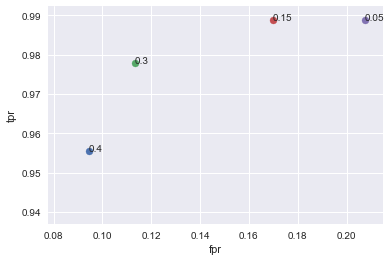

In [209]:
fig, ax = plt.subplots()
for threhold in [0.4,0.3,0.15,0.05]:
    prob_result["new_flg"] = prob_result["benign"].map(lambda x: 1 if x > threhold else 0)
    confusion_m = confusion_matrix(y_test,prob_result["new_flg"])
    print("◆Threhold:",threhold)
    print("Confution matrix:\n{}".format(confusion_m))
    fpr = (confusion_m[0,1])/(confusion_m[0,0]+confusion_m[0,1])
    tpr = (confusion_m[1,1])/(confusion_m[1,0]+confusion_m[1,1])
    plt.scatter(fpr,tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    ax.annotate(threhold, (fpr,tpr))

上記の結果を見ていただくと、閾値を変化させた時の混同行列のそれぞれの要素数も変化していますし、それぞれのプロットの位置も違う位置にいる（偽陽性率や真陽性率も異なる）のがわかります。これを連続的に変化させたのがROC曲線になります（なお、上記はそれほどレコード数が多くないので、プロットをつなぐとグラフがカクカクしてしまいますが、データ量が多いとなめらかな曲線になります）。これは確率分布の考え方に基づいており、以下の参照URLが図も動いてイメージしやすいと思いますので、参考にしてください。

>[参考URL]

> http://qiita.com/kenmatsu4/items/550b38f4fa31e9af6f4f

他、以下の参考文献の8章（Evaluation）なども説明がわかりやすいので、参考にしてください。

>[参考文献]

>『Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies (MIT Press) 』（John D. Kelleher  (著), Brian Mac Namee  (著), Aoife D'Arcy  (著), The MIT Press ）

それでは、もう少し一般的な実装を見ていきましょう。使うモデルは異なりますが、同じくcancerデータを使います。

In [154]:
# 必要なモジュール
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.datasets import load_breast_cancer

# データの読み込みと目的変数と説明変数の分離
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

# ラベル
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

次にモデリングを実施し、閾値を変えた値をそれぞれ取得しています。fprが偽陽性率、tprが真陽性率になります。なお、OneVsRestClassifierを使っており、これは多クラスを分類するためのモジュールですが、のちの練習問題に使うため、ここで実装しています。次の練習問題を解く時に参考にしてください。

In [155]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

ROC曲線は横軸に偽陽性率、縦軸に真陽性率をとり、曲線を引いていきます。このROC曲線が左上に寄っていればいるほどほど良いモデルといえます。

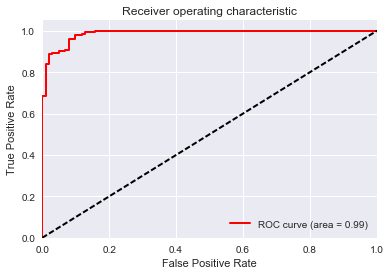

In [89]:
%matplotlib inline

#点のプロット
plt.plot(fpr[0], tpr[0], color='red',lw= 2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='black', lw= 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#ラベルなど
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

参照URL：http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

上記の黒点線はランダムな場合の結果で、ROCは赤の曲線になります。AUC(Area Under the Curve)というROC曲線を利用したモデル評価の指標もあります。その名の通り、ROC曲線の下側の面積（area=0.99）のことで、最大値は1になり、1に近ければ近いほど良いモデルになります。

以上でROC曲線の説明は終わりになります。このROC曲線やAUCも数値が良ければいいというだけではなく、ビジネス的な要求や背景を理解して、閾値を設定する必要があります。適合率を重視するのか、再現率を重視するのか、目的によって用途は異なってきます。

例えば、ある商品を買う確率を予測して、その確率を高めるために、高い人たちに何かのサービスを提供するとします。その確率が50%以上の人を選ぶのと、30%以上の人を選ぶのでは、指標の大きさも異なってきますし、そのコストも変わってきます。例えば、確率が高い人たちを選んで、何かのインセンティブ（おまけ、クーポンなど）を付与する場合には、その費用を考慮する必要があります。このようなコスト（ROIとの関係性）も考えて、利益を出せるのかどうか、本当にその人たち全員にアプローチできるかどうかなど様々なことを考慮する必要があります。

ここが、ビジネスでは大変な部分でもあります。もし現場で使う場合には、ただ正解率やROC曲線を出すだけではなく、これらの結果をどう使ったら良いのかよく考えて、分析業務を進めていきましょう。

以下の参考文献は、Python等の実装はありませんが、上記で説明したROC曲線や混同行列について詳しく載っていますので、復習のためにぜひ目を通してください。また、ビジネス的な視点でデータサイエンスを記載されていますので、参考になります。

>[参考文献]

>『戦略的データサイエンス入門 ―ビジネスに活かすコンセプトとテクニック』（Foster Provost (著), Tom Fawcett (著), 竹田 正和(監訳) (翻訳), 古畠 敦 (翻訳)、オライリージャパン）

#### <練習問題 1>

irisデータに対して、モデリングを実施（目的変数iris.targetを予測）し、ROC曲線とAUCを計算してみましょう。

## 9.4 シミュレーションと計算統計学の基礎
ゴール：シミュレーションと計算統計学の基本的な考え方を理解し、簡単な実装できること

### 9.4.1 ジャックナイフ法
キーワード：ジャックナイフ法、交差検証法

ここからシミュレーションや計算統計学の基礎について学びます。これらの分野を学ぶモチベーションとしては、前述した通りで、現実的にデータは完全ではないことが多く、また理論的な計算が困難なモデルもあり、それらに対していかにアプローチしていくかを考えます。

まずは、**ジャックナイフ法**です。これは、先ほど学んだ交差検証法の1つデータ抜きバージョンに近いイメージです。データがN個あった場合に、1個だけデータを取り除き、残りのN-1個で推定量の値を計算します。ここでデータは重複を許さずに抽出して（非復元抽出）、計算します。これをN個のデータに対して繰り返し計算し、推定量の標準誤差を推定します。

ここでジャックナイフ法を使って、簡単な例を見てみましょう。以下は、1章と同じデータを標準正規分布から1000個生成して、標準誤差を推定しています。

In [35]:
# 乱数の発生のためのモジュール読み込み
import numpy.random as random
import numpy as np
%precision 3

random.seed(0)

# 正規分布（平均0、分散1）の乱数を1000個発生
norm_random_sample_data = random.randn(1000)

In [36]:
i = 0
mean_array = np.array([])
for i in range(0,len(norm_random_sample_data)):
    ind = np.ones(1000, dtype=bool)
    extract_num = [i]
    ind[i] = False
    mean_array = np.append(mean_array,norm_random_sample_data[ind].mean())

In [37]:
x = (mean_array - mean_array.mean())**2

In [38]:
np.sqrt(x.sum() * 99/100)

0.031

なお、ジャックナイフ法は以下で紹介するブートストラップ法よりも計算量が減りますが、適応できる推定量の範囲が多少狭くなったりするなど課題もあります。

### 9.4.2 ブートストラップ法
キーワード：ブートストラップ法、復元抽出

次は、**ブートストラップ法**です。先ほどは、データの非復元抽出でデータを抜き出しましたが、このブートストラップ法は復元抽出でデータを取り出します。後で学ぶアンサンブル学習で使います。

以下は簡単な例ですが、データ1000個の中から、500個をリサンプリグして平均を計算し、標準誤差を算出しています。

In [39]:
i = 0
random.seed(0)
mean_array_boot = np.array([])
for i in range(0,len(norm_random_sample_data)):
    mean_array_boot = np.append(mean_array_boot,random.choice(norm_random_sample_data,500,replace=True).mean())

In [40]:
x = (mean_array_boot - mean_array_boot.mean())**2

In [41]:
np.sqrt(x.sum() /1000)

0.042

このブートストラップ法は、以下で学ぶアンサンブル学習以外にも、様々な場面で応用されており、データサイエンスを学んでいると必ず見る手法になると思いますので、基本的なイメージはできるようにしておきましょう。

### 9.4.3 EMアルゴリズム
キーワード：EMアルゴリズム、最尤法

この節の最後に、計算統計学でよく出てくるEMアルゴリズムについて説明します。また、EMアルゴリズムは機械学習の専門書などでもよく扱われます。

**EMアルゴリズム**とは、不完全なデータについて、最尤法に基づいた推測をするための手法です。計算ステップとしては、期待値計算ステップ（Expectation）と最大化ステップ（Maximization）を反復することで、尤度が最大となるパラメータを計算します。これがEMアルゴリズムと言われるゆえんです。本講座の1章確率統計の基礎で最尤法について学びましたが、このEMアルゴリズムは（対数）尤度関数を最大化する計算をします。

ここでは実装しませんが、EMアルゴリズムの詳しい説明や実装については、以下が参考になりますので、ぜひ読んでみてください。

>[参考文献]

>『ITエンジニアのための機械学習理論入門』（中井 悦司  (著)、技術評論社）

>[参照URL]

>http://d.hatena.ne.jp/teramonagi/20120909/1347194703

補足ですが、このEMアルゴリズムは前の章で学んだ教師なし学習k-meansとも関係あります。k-meansの計算ステップを簡単に思い出しますと、はじめに適当に点を取って、そこに近い点を結びつけて中心をとり、その計算を繰り返しました。他、EMアルゴリズムは教師なし学習で少し触れたソフトクラスタリングで最尤法を計算する時（混合ガウスモデル）に使いますので、興味のある方は、上記の本や、後で紹介する参考文献等を見てください。

あと計算統計学の分野としては、前半で学んだモンテカルロ法やMCMC（マルコフ連鎖モンテカルロ法）や、EMアルゴリズムを応用した例（隠れマルコフモデルなど）が色々とあります。計算統計学について、もっと学びたい方は以下のような文献がありますので、今後の学習の参考にしてください。

>[参考文献]

>『計算統計学の方法』（小西 貞則  (著), 越智 義道  (著), 大森 裕浩  (著)、朝倉書店）

## 9.5 アンサンブル学習
ゴール：アンサンブルの基本的な手法（バギング、ブースティング、ランダムフォレスト）について理解して、実装ができること

### 9.5.1 バギング
キーワード：バギング

バギングは、ブートストラップを寄せ集めることをいいます。ブートストラップですので、データを復元抽出して、その各標本に対して一つ一つモデルを作成します。そのあとに、そのモデルの結果で多数決を取ったり、平均を計算したりします。バギングは、モデルのバリアンスが大きいときに有効です。

以下が実装になります。BaggingClassifierを使います。

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

clf =bagging
clf.fit(X_train, y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: BaggingClassifier 0.943661971831
test: BaggingClassifier 0.916083916084


### 9.5.2 ブースティング
キーワード：ブースティング、アダブースト

先ほどのバギングはブートストラップのため個別のグループで計算で、並列計算になりますが、ブースティングは逐次的に計算をしていき、これがバギングと異なる点です。ブースティング（ここではアダブースト）には分類（AdaBoostClassifier）と回帰（AdaBoostRegressor）があり、以下は分類のモデルを作成しています。なお、ブースティングは、分類器のバイアスが高いときに有効です。

実装は以下で、AdaBoostClassifierを使います。

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

clf = AdaBoostClassifier(learning_rate=1.0)
clf.fit(X_train, y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test)) # 若干、オーバーフィッティングしている

train: AdaBoostClassifier 1.0
test: AdaBoostClassifier 0.951048951049


上記の結果は、学習データが正解率100%になってテストデータで95%になっているため、過学習気味になっているようです。このモデルでは、learning rateによってあてはまりの強さを調整できます。ここでは1としましたが、値を色々と変えて試してみて下さい。

>**[やってみよう]**

>アダブーストについてのパラメータについて調べてみましょう。上の過学習を防ぐために、どうやってパラメータを設定しますか。

以下は、パラメータ調整の参考コードです。ただし、この結果を利用しても、新しい未知のデータに対して予測がうまくできず、過学習になる可能性があります。そのため、冒頭で述べた学習用データと検証用データとテストデータを用意し、学習用データと検証用データでパラメータを調整し、最後にテストデータで結果を見るというアプローチを取ります。

In [45]:
# パラメータを設定してループでまわす
score_list = []

for r in np.arange(0.00001,2,0.01):    
    clf = AdaBoostClassifier(learning_rate=r)
    clf.fit(X_train, y_train)
    score_list.append([r,clf.score(X_test,y_test)])

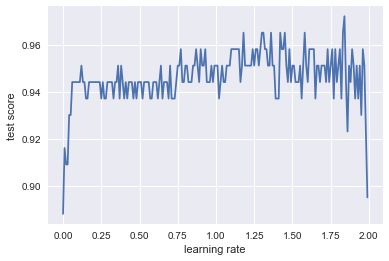

In [46]:
score_list_df = pd.DataFrame(score_list)
score_list_df.columns= ["r","score"]

plt.plot(score_list_df.r,score_list_df.score)
plt.xlabel("learning rate")
plt.ylabel("test score")
plt.grid(True)

### 9.5.3 ランダムフォレスト
キーワード：ランダムフォレスト、特徴量の重要度

ランダムフォレストとは複数の決定木を組み合わせる方法で、これもアンサンブル手法の1つで、バギングを改良した方法です。個別の決定木よりも汎化性能が高く、データの外れ値の影響を受けにくいです。ただし、解釈が難しく、その計算ロジックを説明するのも困難ですので、現場の状況に応じて使いましょう。

ここではランダムフォレストの詳しいアルゴリズムの解説等はしませんが、以下のサイトなどを参考にしてください。

>[参考URL]

>https://ja.wikipedia.org/wiki/ランダムフォレスト

次は、実装例です。cancerのデータを使って、モデルを構築、検証しています。

In [44]:
import numpy as np
import matplotlib.pyplot as plt
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

f_model=RandomForestClassifier()
clf = f_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: RandomForestClassifier 1.0
test: RandomForestClassifier 0.923076923077


なお、それぞれの特徴量の重要度については、feature_importances_で抽出することができます。それぞれの数値を足すと1になるように正規化されており、相対的な重要度のランキングになっています。

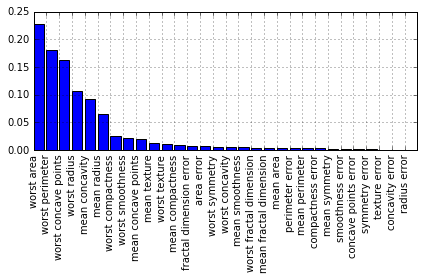

In [45]:
%matplotlib inline

importances = f_model.feature_importances_
indi = np.argsort(importances)[::-1]

label = cancer.feature_names

plt.bar(range(X_train.shape[1]),importances[indi])
plt.xticks(range(X_train.shape[1]),label[indi],rotation=90)
plt.grid(True)
plt.tight_layout()

以上で、本章のモデル検証やチューニング方法についての解説は終わりになります。お疲れ様でした。

アンサンブル学習については、ここで紹介した以外の手法もいろいろとありますので、下記のサイト等が参考になります。他、scikit-learnには実に様々なモジュール（データのケーリングから検証までの一貫処理をサポートするPiplelineなど）がありますので、便利です。

>[参考URL]

>http://scikit-learn.org/stable/modules/ensemble.html

さらに参考ですが、今後の学習のための参考書を紹介します。後半は少し難易度がある機械学習の本で、より理論的な知識や実装を身につけたい方には以下がオススメです。ある程度数学的なバックグランドも必要ですが、この講座を終えた後であれば大丈夫だと思います。

>[参考文献]

>『はじめてのパターン認識』（平井 有三 (著)、森北出版）

>『ITエンジニアのための機械学習理論入門』（中井 悦司  (著)、技術評論社）

>『Python Machine Learning』（Sebastian Raschka、Packt Publishing Ltd.、翻訳：Python機械学習プログラミング）

>『Python for Probability, Statistics, and Machine Learning』（Jose Unpingco、翻訳：科学技術計算のためのPython＜確率・統計・機械学習＞）

上記はどちらかというと比較的数式が多く、あまりビジネス的な視点では多くは書かれていません。以下の参考文献は、ビジネスでデータサイエンスを活かす視点で記載されていますので、ぜひ参考にしてください。(最後の洋書は実装はなく、数式が若干ありますが、ビジネス的な観点もしっかり書いてありますので、オススメです。)

>[参考文献]

>『戦略的データサイエンス入門 ―ビジネスに活かすコンセプトとテクニック』（Foster Provost (著), Tom Fawcett (著), 竹田 正和(監訳) (翻訳), 古畠 敦 (翻訳)、オライリージャパン）

>『データサイエンス講義』（Rachel Schutt (著), Cathy O'Neil (著), 瀬戸山 雅人  (翻訳), 石井 弓美子 (翻訳), & 7 その他、オライリージャパン）

>『データ分析プロジェクトの手引: データの前処理から予測モデルの運用までを俯瞰する20章』（David Nettleton (著), 市川 太祐 (翻訳), 島田 直希 (翻訳)、共立出版）

>『Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies (MIT Press) 』（John D. Kelleher  (著), Brian Mac Namee  (著), Aoife D'Arcy  (著), The MIT Press ）

## 9.6 総合問題

### 9.6.1 総合問題1

データload_breast_cancerを使って、目的変数をcancer.targetとして、予測モデル（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレスト）を構築し、交差検証（5分割）によりどのモデルが一番良いでしょうか。実装してください。